In [78]:
import matplotlib.pyplot as plt
import numpy as  np
import pandas as pd
import seaborn as sns

### 1. Load the dataset into python environment.

### 2. Make ‘PassengerId’ as the index column.

In [79]:
data= pd.read_csv(r"D:\Personal files\Data science Materials\ICT Academy_Materials\Data sets\titanic_dataset.csv",index_col='PassengerId')

In [80]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### 3. Check the basic details of the dataset.

In [82]:
data.shape

(891, 11)

In [83]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [84]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [85]:
data['FamMembers'] = data.SibSp+data.Parch

In [86]:
data.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamMembers
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


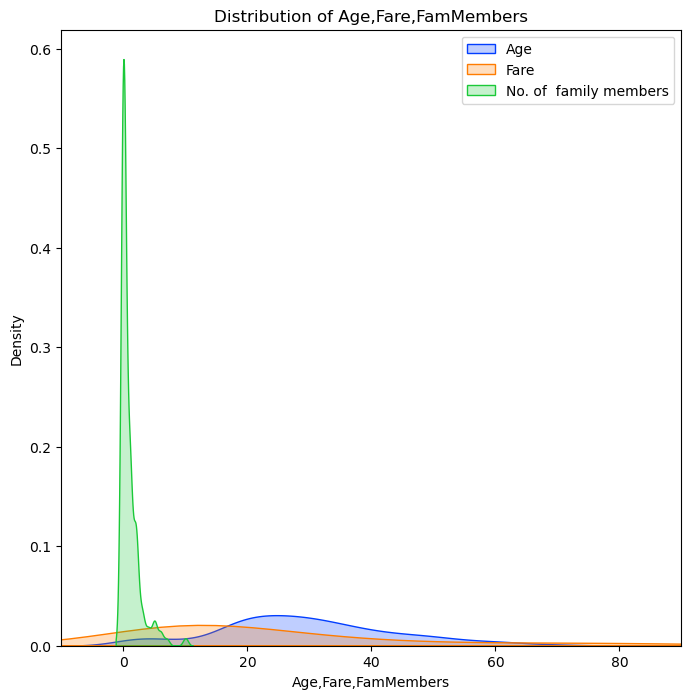

In [87]:
sns.set_palette("bright", 8, 1)
plt.figure(figsize=(8,8))

ax = sns.kdeplot(data['Age'],shade=True)
ax = sns.kdeplot(data['Fare'],shade=True)
ax = sns.kdeplot(data['FamMembers'],shade=True)

ax.set_xlim(-10, 90)
ax.set_xlabel('Age,Fare,FamMembers')
ax.set_title('Distribution of Age,Fare,FamMembers')
plt.legend(['Age','Fare','No. of  family members'])
plt.show()

#### Filling the correlation between the Columns.

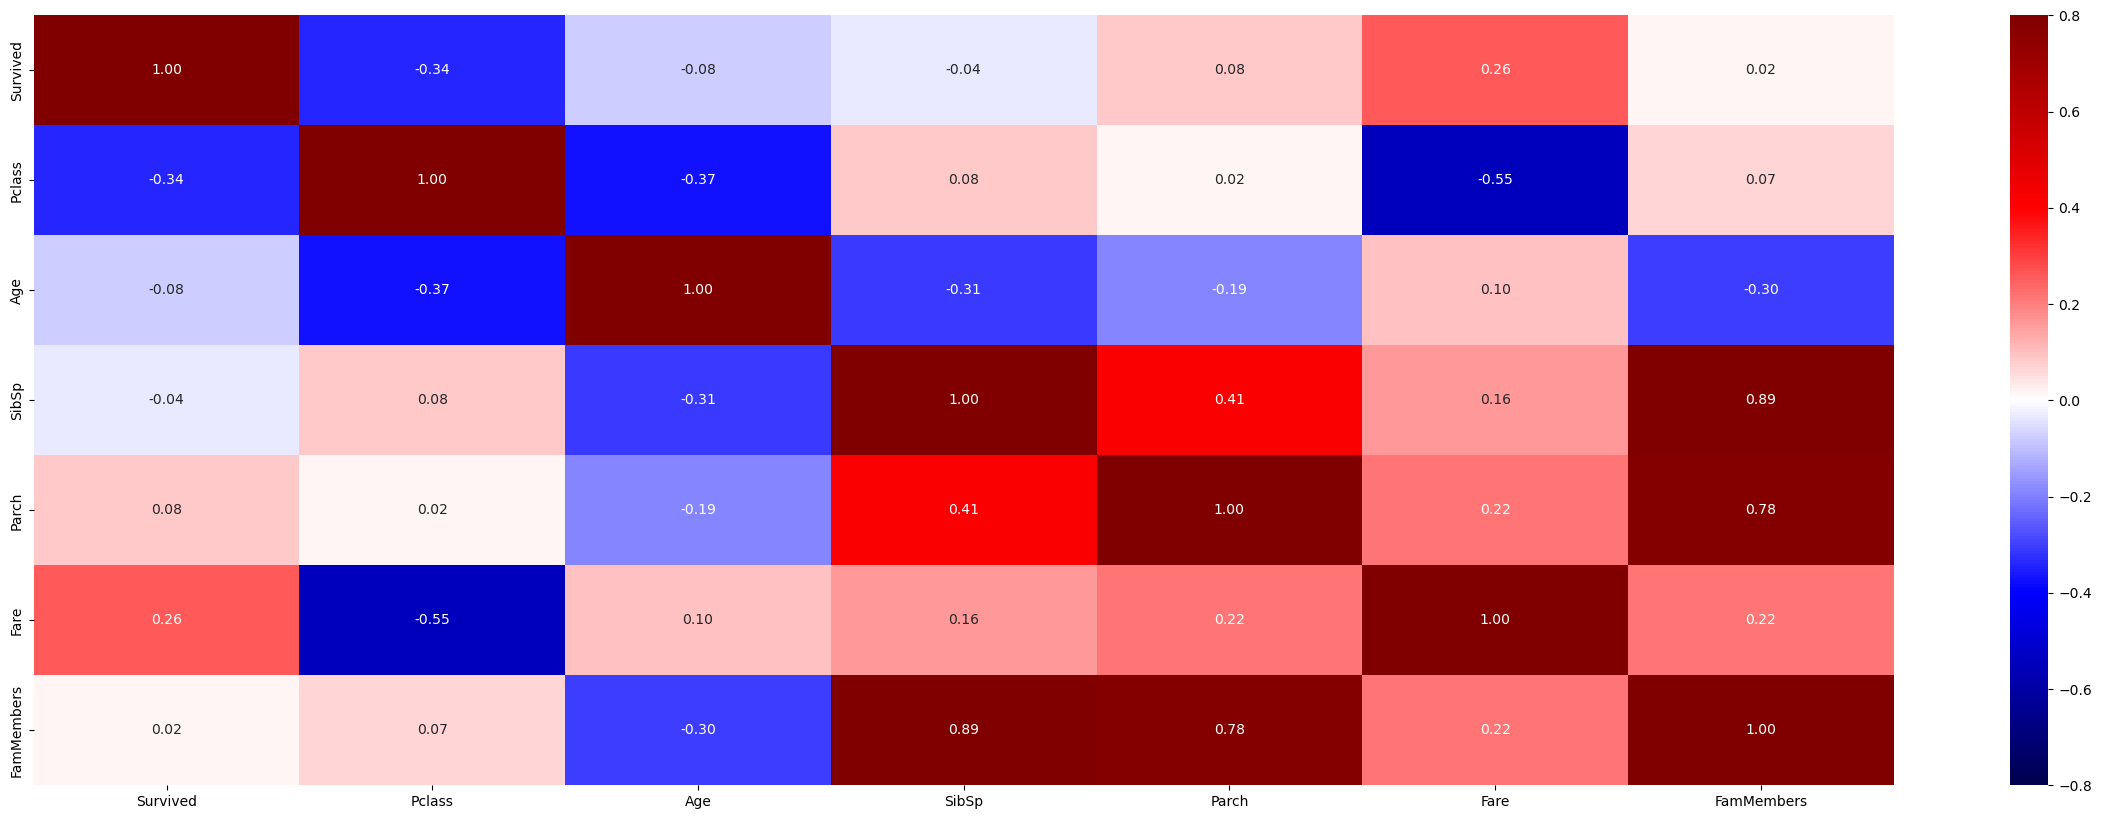

In [88]:
corr_matrix = data.corr()
plt.subplots(figsize= (30,10))
sns.heatmap(corr_matrix, fmt='.2f', annot=True, vmin= -0.8, vmax= 0.8, cmap='seismic')
plt.show()

#### By looking at the heatmap of the correlation between each column we can understand that the column 'Age' has no significance when targeting the column 'Survived' as our study area.

### 4. Fill in all the missing values present in all the columns in the dataset

In [89]:
data.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [90]:
data[data['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamMembers
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


##### Mrs Stone boarded the Titanic in "Southampton" on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28.  Source:https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

##### so column 'Embarked' can either be filled with the value S or directly filled with the mode of the column.

In [91]:
data['Cabin'].fillna("Unknown", inplace=True)

In [92]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [93]:
data['Age'][data['Age'].isnull()==True]=data[data['Age'].isnull()==False].median()[0]

C:\Users\karth\AppData\Local\Temp\ipykernel_10768\3462280074.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['Age'][data['Age'].isnull()==True]=data[data['Age'].isnull()==False].median()[0]
C:\Users\karth\AppData\Local\Temp\ipykernel_10768\3462280074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'][data['Age'].isnull()==True]=data[data['Age'].isnull()==False].median()[0]


In [94]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
FamMembers    0
dtype: int64

##### Distribution after filling up the missing data.

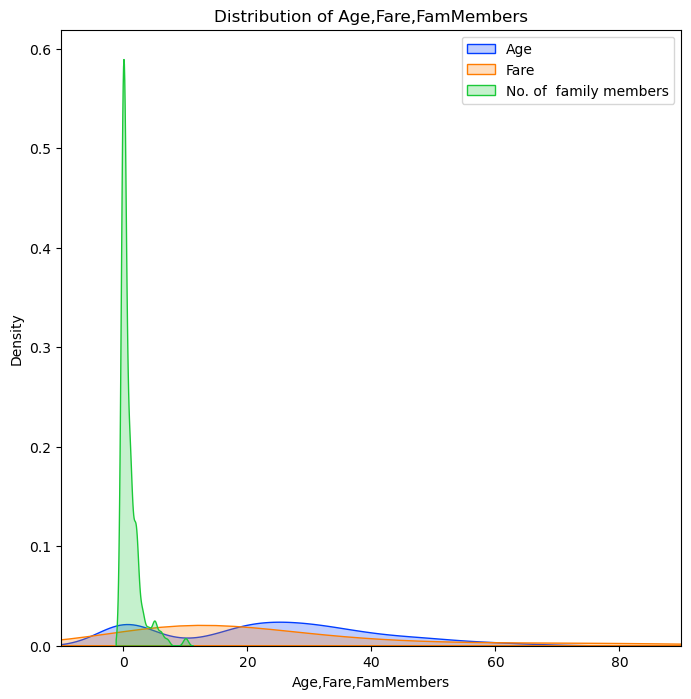

In [95]:
#sns.set_palette('Reds')
sns.set_palette("bright", 8, 1)
plt.figure(figsize=(8,8))

ax = sns.kdeplot(data['Age'],shade=True)
ax = sns.kdeplot(data['Fare'],shade=True)
ax = sns.kdeplot(data['FamMembers'],shade=True)

ax.set_xlim(-10, 90)
ax.set_xlabel('Age,Fare,FamMembers')
ax.set_title('Distribution of Age,Fare,FamMembers')
plt.legend(['Age','Fare','No. of  family members'])
plt.show()

### 5. Check and handle outliers in at least 3 columns(Age, Fare & Fam_Members) in the dataset


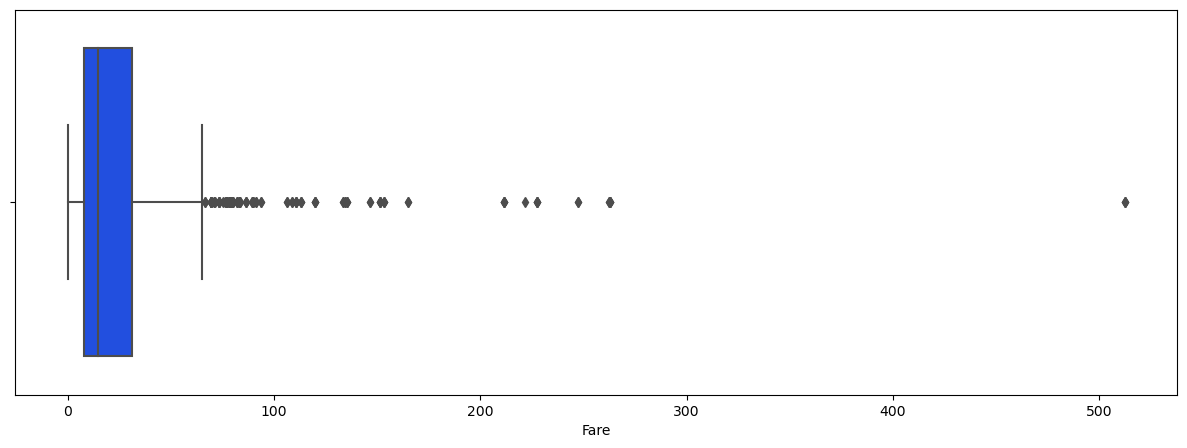

In [96]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,x=data.Fare)
plt.show()

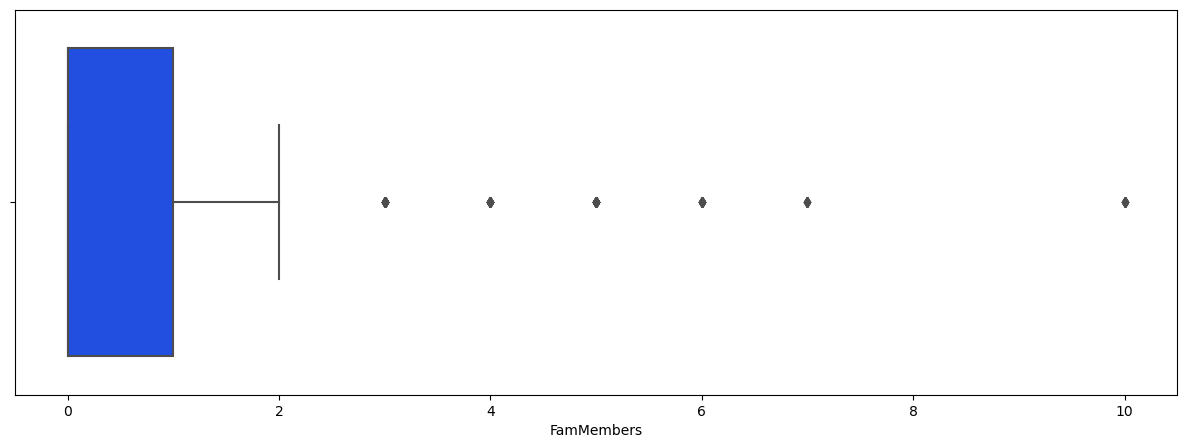

In [97]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,x=data.FamMembers)
plt.show()

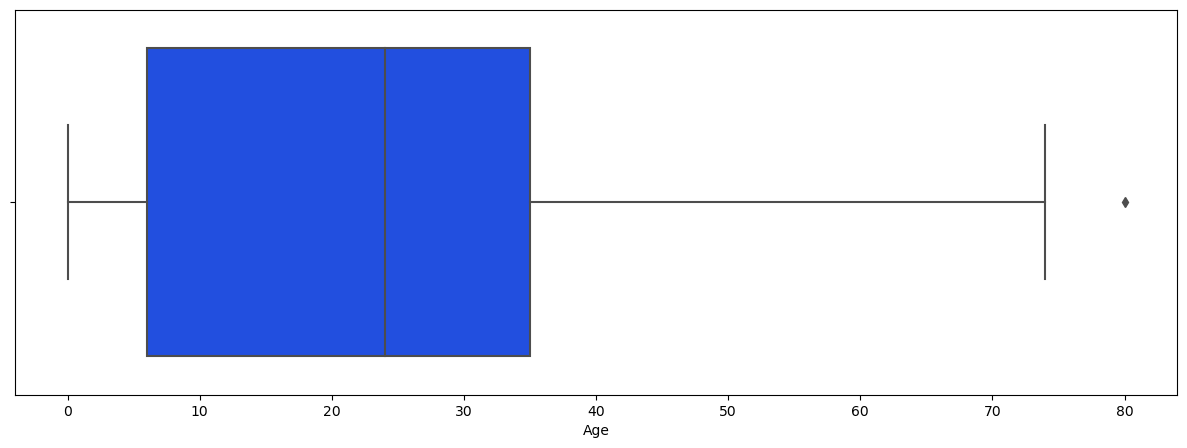

In [98]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,x=data.Age)
plt.show()

#### Handling outliers from the column FARE

In [99]:
IQR=data.FamMembers.quantile(0.75)-data.FamMembers.quantile(0.25)
low=data['FamMembers'].quantile(0.25)-(IQR*1.5)
upp=data['FamMembers'].quantile(0.75)+(IQR*1.5)
print(low)
print(upp)

-1.5
2.5


In [100]:
data.loc[data['FamMembers']>=2.5,'FamMembers']=2.5

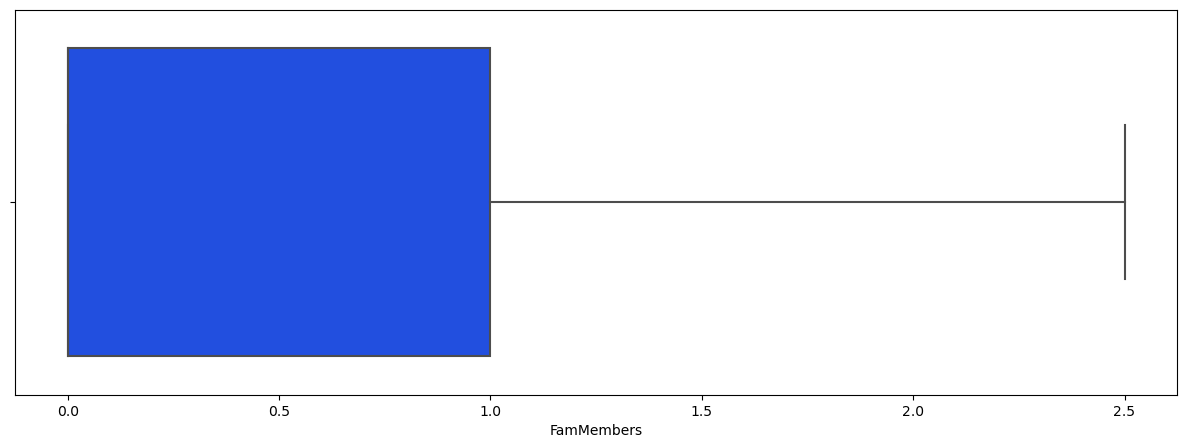

In [101]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,x=data.FamMembers)
plt.show()

##### In case of the outliers in columns like Age and Fare they are significant in the study so removing or changing the outliers is not a viable option.

##### Deleting all redundent columns by using drop function after refering to code line output [11] 

In [102]:
df=data.drop(["SibSp","Parch","Ticket",'Cabin',"Name",'Age','Fare'],axis=1)

In [103]:
df.dtypes

Survived        int64
Pclass          int64
Sex            object
Embarked       object
FamMembers    float64
dtype: object

In [104]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [105]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [106]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

### one-hot encoding

In [107]:
df=pd.get_dummies(df)

In [108]:
df.head(2)

,Survived,Pclass,FamMembers,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,0,3,1.0,0,1,0,0,1
2,1,1,1.0,1,0,1,0,0


### Min - Max Scaling

In [109]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
min_max = MinMaxScaler(feature_range=(0,1))

In [111]:
x = min_max.fit_transform(df)

In [112]:
x

array([[0. , 1. , 0.4, ..., 0. , 0. , 1. ],
       [1. , 0. , 0.4, ..., 1. , 0. , 0. ],
       [1. , 1. , 0. , ..., 0. , 0. , 1. ],
       ...,
       [0. , 1. , 1. , ..., 0. , 0. , 1. ],
       [1. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 1. , 0. ]])

In [113]:
df.columns

Index(['Survived', 'Pclass', 'FamMembers', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [114]:
x=pd.DataFrame(x,columns=['Survived', 'Pclass', 'FamMembers', 'Sex_female','Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'])

In [115]:
x

,Survived,Pclass,FamMembers,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.4,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.4,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.4,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.0,0.0,1.0,0.0,0.0,1.0
887,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
